# Visualizing sports data: basketball

In this notebook we're going to look at ways of visualizing performance in basketball. We are going to use the data that we were introduced to last week.

Our analysis here is going to focus on the where the ball was thrown from, which is recorded using (x, y) co-ordinates, in the same way that we had the coordinates for the baseball data. This data is  easy to graph and illuminating. 

We choose three different ways to look at the data

1. shot outcome: scored, missed or blocked
2. shot types by player
3. narrowing the focus to a particular region of the court



In [1]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The data consists of the shot log for the NBA season 2016/17

shot = pd.read_csv("../Data/NBA Shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


From the print() command we have a good deal of information on each shot, including the name of the player, the type of shot, team names, time in the game and so on. From the .describe() we can see that there are over 210,000 shots in the data although there is a small number of shots with missing coordinates (around 400). Also note that the x-axis location variable (this is the sideline) ranges from 0 to 993, while the y-axis variable (this is the baseline) runs from 0 to 500.

We can generate a simple plot as follows:

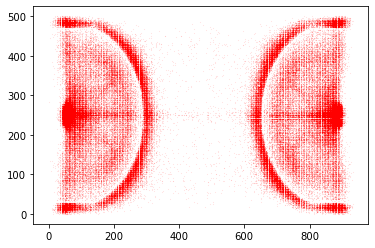

In [3]:
# A simple plot of coordinates

x = shot['location_x']
y = shot['location_y']
plt.scatter(x,y, s=.005,c='r', marker= '.')

One point to note about the data is that it does not include free throws - otherwise there would be a deep red concentration at the center of the free throw line.

The plot above gives us a very clear picture of the location of shots, notably from under the basket and from the three point line. However, the plot does not take account of the proportions of the court. Moreover, it would be useful to add a grid to identify more clearly the different locations.

The dimensions of the court defined by the NBA are 94 feet by 50 feet. We can specify that ratio using figsize = (a,b). Note that we can also scale this to control the size of the plot in our window (we divide both the x and y figsize by 6).

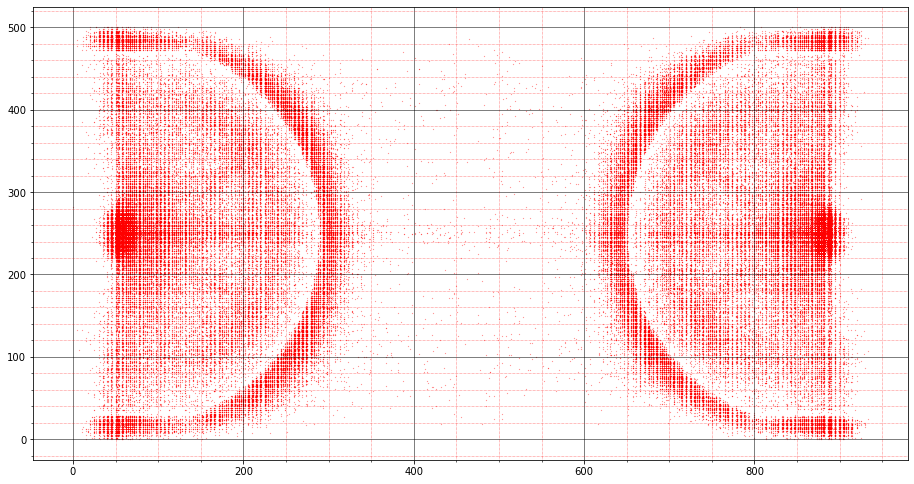

In [4]:
# A simple plot of coordinates, scaled for court dimensions and with grid added.

plt.figure(figsize=(94/6,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')

Rather than look at both ends of the court, we can just look at one half of the court by fixing the range of the x axis using plt.xlim, which we set to cover the right hand half court. Note that to maintain the same dimensions we also need to halve the x axis on figsize (to 94/12 rather than 94/6).

(466.5, 933.0)

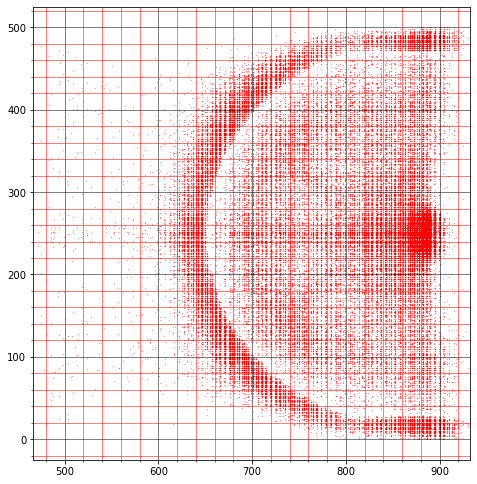

In [5]:
# The right hand half court

plt.figure(figsize=(94/12,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linewidth='.5', color='black')
plt.grid(which='minor', linewidth='.5', color='red')
plt.xlim(933/2, 933)

The last plot just shows us one half of the court. To include both halves but show only the half court, we can convert the coordinates from the left hand half court so that they have the same relative location on the right hand half court (of course, there should be no real difference in performance based on which end of the court the player is attacking, and the two halves are mirror images of each other).

We can convert the plot to show shots from both ends on a half court if we adjust the coordinates. The x-axis runs from 0 to 933, so if we want to just show the right hand half court with all shots, we can recode the location_x variables, where x is less the 933/2 (the left had half court) as equal to "933 - location_x". This produces a mirror image of the x coordinate in the right hand half of the court. However, since the direction toward the basket is the reverse of the other half court, we need to take the mirror image of the y coordinate for shots in the left had half court - that is "500 - location_y".

The following code (which works like an "if" statement in Excel) creates these mirror images:

In [6]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


Note that the sideline coordinates now only run between 468 and 933, but that the baseline coordinates still run between 0 and 500, even though all the y locations have been changed. We can now plot the half court data, noting that we now halve the x axis in figsize, to preserve the same proportions as before.

Text(0.5, 1.0, 'Shots')

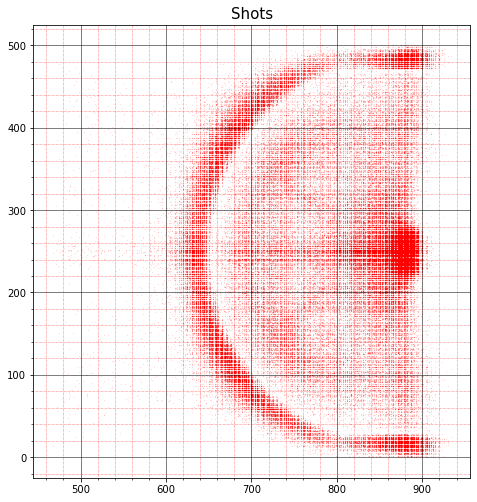

In [7]:
# all shots shown on a half court

hx = shot['halfcourt_x']
hy = shot['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hx,hy, s=.01,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Shots", fontsize = 15)


## Easy self test

Experiment with different sized markers. What size do you think gives you the best visual representation of the data? Why? 

## More difficult self test

Show all the shots on a halfcourt, but show the data with the baseline on the left, not on the right.

We now breakdown shots into three categories: scored, missed and blocked. To do this we simply create subsets of the shot df based on shot outcome.

Text(0.5, 1.0, 'Scored')

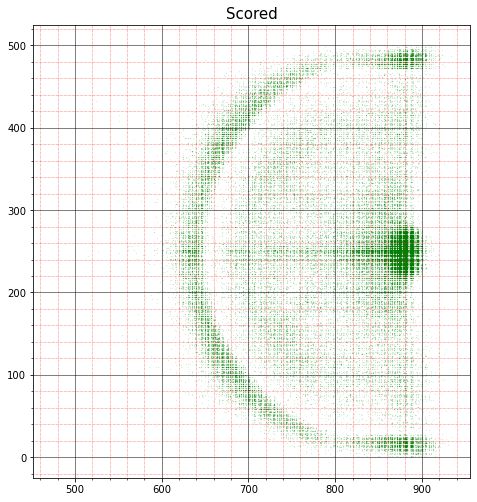

In [8]:
# Scoring shots

Scored = shot[shot.current_shot_outcome == 'SCORED']
hxs = Scored['halfcourt_x']
hys = Scored['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxs,hys, s=.01,c='g', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Scored", fontsize = 15)


Text(0.5, 1.0, 'Missed')

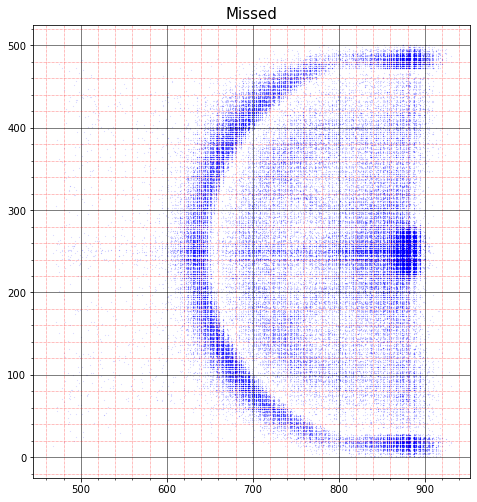

In [9]:
# Missed Shots

Missed = shot[shot.current_shot_outcome == 'MISSED']

hxm = Missed['halfcourt_x']
hym = Missed['halfcourt_y']

plt.figure(figsize=(94/12,50/6))
plt.scatter(hxm,hym, s=.01,c='b', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Missed", fontsize = 15)

Text(0.5, 1.0, 'Blocked')

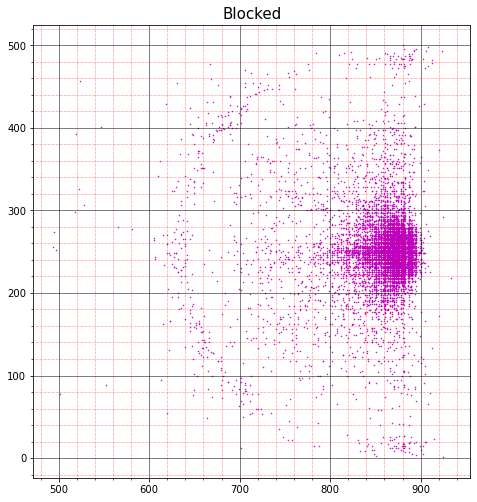

In [10]:
# Blocked shots

Blocked = shot[shot.current_shot_outcome == 'BLOCKED']

hxb = Blocked['halfcourt_x']
hyb = Blocked['halfcourt_y']

plt.figure(figsize=(94/12,50/6))
plt.scatter(hxb,hyb, s=1,c='m', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Blocked", fontsize = 15)


While informative, the location of shots by shot type is not that surprising. There has been a lot of interest in recent years in the rise of the 3-point shot with evidence suggesting that in the past there were more more shots from distance inside the three-point line, and that these have tended to die out since the payoff is much lower than a shot from just outside the three-point. We don't have past data here to make the comparison.

Probably the greatest interest lies in comparing individual players. We can do this easily by taking subsets as we did above. First it's useful to generate a list of player names.

In [11]:
# Comparing players

# We use a pivot table here to list players by shots

playersn = shot.groupby('shoot_player')['current_shot_outcome'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,shoot_player,count,unique,top,freq
402,Russell Westbrook,1940,3,MISSED,1026
25,Andrew Wiggins,1568,3,MISSED,760
106,DeMar DeRozan,1545,3,MISSED,731
193,James Harden,1532,3,MISSED,772
28,Anthony Davis,1525,3,SCORED,770
...,...,...,...,...,...
111,Demetrius Jackson,4,2,SCORED,3
203,Jarrett Jack,3,2,SCORED,2
38,Ben Bentil,3,1,MISSED,3
202,Jarnell Stokes,1,1,SCORED,1


We now compare LeBron James with Steph Curry. 

In [12]:
# LeBron subset

LeBron = shot[shot['shoot_player']=='LeBron James']
LeBron

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
35023,MISSED,SF,Yes,131.0,SCORED,CLE,Jump Shot,2,NYK,171.0,1:01,10/25/2016,LeBron James,27.0,1,SCORED,802.0,329.0
35028,MISSED,SF,Yes,236.0,MISSED,CLE,Jump Shot,3,NYK,84.0,2:33,10/25/2016,LeBron James,6.0,1,MISSED,697.0,416.0
35030,BLOCKED,SF,Yes,264.0,SCORED,CLE,Jump Shot,3,NYK,383.0,3:44,10/25/2016,LeBron James,42.0,1,MISSED,669.0,117.0
35037,SCORED,SF,Yes,50.0,MISSED,CLE,Running Layup,2,NYK,259.0,6:04,10/25/2016,LeBron James,17.0,1,SCORED,883.0,241.0
35044,MISSED,SF,Yes,52.0,SCORED,CLE,Putback Dunk,2,NYK,250.0,8:23,10/25/2016,LeBron James,4.0,1,SCORED,881.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41795,MISSED,SF,No,51.0,SCORED,ATL,Driving Layup,2,CLE,246.0,1:16,4/9/2017,LeBron James,47.0,4,MISSED,882.0,254.0
41798,SCORED,SF,No,58.0,SCORED,ATL,Driving Layup,2,CLE,249.0,3:36,4/9/2017,LeBron James,58.0,4,SCORED,875.0,251.0
41801,SCORED,SF,No,52.0,MISSED,ATL,Driving Dunk,2,CLE,250.0,5:54,4/9/2017,LeBron James,29.0,4,SCORED,881.0,250.0
41806,SCORED,SF,No,77.0,SCORED,ATL,Fadeaway Jumper,2,CLE,450.0,8:54,4/9/2017,LeBron James,31.0,4,MISSED,856.0,50.0


Text(0.5, 1.0, 'LeBron James')

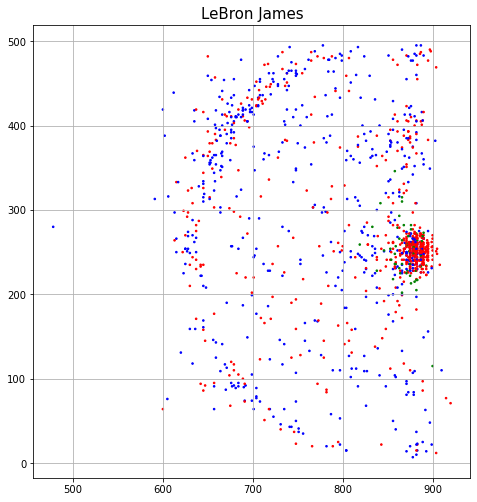

In [13]:
# LeBron plot
# Note how the shots can be color coded using an np.where statement. 

hxL = LeBron['halfcourt_x']
hyL = LeBron['halfcourt_y']
colors = np.where(LeBron['current_shot_outcome']=='SCORED','r',np.where(LeBron['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxL,hyL, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("LeBron James", fontsize = 15)

Text(0.5, 1.0, 'Steph Curry')

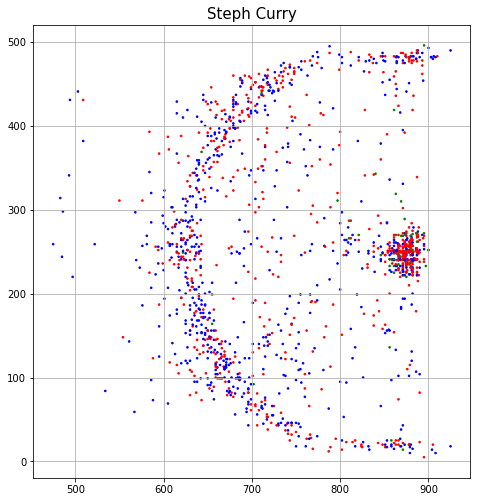

In [14]:
# Steph Curry plot

Curry = shot[shot['shoot_player']=='Stephen Curry']
hxC = Curry['halfcourt_x']
hyC = Curry['halfcourt_y']
colors = np.where(Curry['current_shot_outcome']=='SCORED','r',np.where(Curry['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxC,hyC, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Steph Curry", fontsize = 15)

Text(0.5, 1.0, 'Steph Curry')

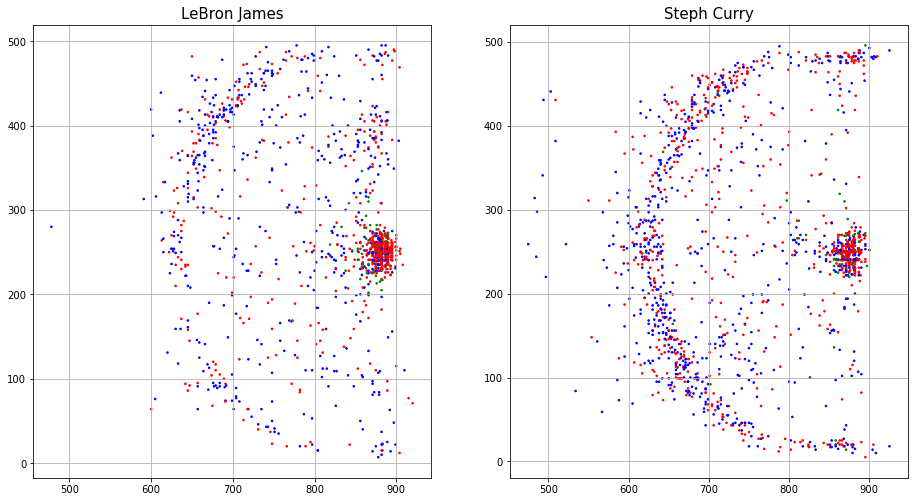

In [15]:
# LeBron James and Steph Curry side by side

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(LeBron['current_shot_outcome']=='SCORED','r',np.where(LeBron['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxL,hyL, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("LeBron James", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Curry['current_shot_outcome']=='SCORED','r',np.where(Curry['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxC,hyC, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Steph Curry", fontsize = 15)

These simple plots make clear some of the differences between the two players. It is clearly visible that Curry shoots more from the three-point line than LeBron, while LeBron is more active on the paint. Some more subtle differences are also visible. LeBron is more active on the left hand side of the court, while Curry is equally active on both sides. Curry also shoots more thre-pointers from the corners.

## Self Test

Identify two other players in the data and generate a similar comparison for those players.

As a final exercise we zoom in on the data to see what it looks like close up. We can identify a particular location based on our grid. First, we look at shots from the paint. We can define the paint here as x coordinates between 700 and 900, and y coordinates 200 and 300. We first create this subset, then we create the plot.

In [16]:
# Define the subset

rect1 = shot[(((shot['location_x']>700) & (shot['location_x']<900)) & \
                 ((shot['location_y'] > 200) & (shot['location_y'] < 300)))]
rect1

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
49,MISSED,PG,Yes,886.0,SCORED,ATL,Driving Layup,2,WAS,257.0,0:15,10/27/2016,Dennis Schroder,NaN,3,SCORED,886.0,257.0
51,MISSED,PF,Yes,871.0,SCORED,ATL,Driving Layup,2,WAS,246.0,1:26,10/27/2016,Paul Millsap,24.0,3,SCORED,871.0,246.0
53,MISSED,PF,Yes,868.0,SCORED,ATL,Driving Layup,2,WAS,257.0,3:31,10/27/2016,Paul Millsap,58.0,3,SCORED,868.0,257.0
54,SCORED,PG,Yes,882.0,MISSED,ATL,Driving Layup,2,WAS,228.0,4:11,10/27/2016,Dennis Schroder,40.0,3,SCORED,882.0,228.0
59,MISSED,C,Yes,888.0,MISSED,ATL,Dunk,2,WAS,250.0,6:51,10/27/2016,Dwight Howard,22.0,3,SCORED,888.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210017,SCORED,G,No,882.0,MISSED,MIA,Driving Layup,2,WAS,241.0,4:19,4/12/2017,Sheldon McClellan,81.0,2,SCORED,882.0,241.0
210018,SCORED,PG,No,824.0,SCORED,MIA,Jump Shot,2,WAS,251.0,4:50,4/12/2017,Trey Burke,31.0,2,SCORED,824.0,251.0
210020,MISSED,G,No,886.0,SCORED,MIA,Driving Layup,2,WAS,238.0,6:18,4/12/2017,Sheldon McClellan,34.0,2,MISSED,886.0,238.0
210021,MISSED,PG,No,706.0,SCORED,MIA,Step Back Jump Shot,2,WAS,236.0,7:17,4/12/2017,Trey Burke,59.0,2,SCORED,706.0,236.0


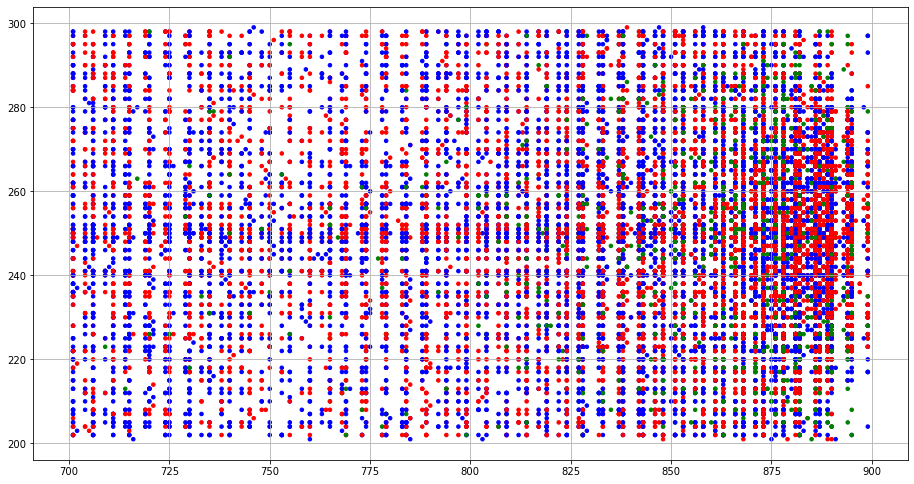

In [17]:
# Shots on the paint

xr = rect1['location_x']
yr = rect1['location_y']
colors = np.where(rect1['current_shot_outcome']=='SCORED','r',np.where(rect1['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/6,50/6))
plt.scatter(xr,yr, s=50, c= colors, marker= '.')
plt.grid(True)

Note how the locations appear in vertical lines. This reflects the fact that the resolution of the location coding is finite. The difference between adjacent vertical lines on this plot is approximately one inch (2.5cm).

But we can still zoom in further. Below we look at the area immediately under the basket:

In [18]:
# subset area

rect2 = shot[(((shot['location_x']>850) & (shot['location_x']<875)) & \
                 ((shot['location_y'] > 240) & (shot['location_y'] < 260)))]
rect2

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
51,MISSED,PF,Yes,871.0,SCORED,ATL,Driving Layup,2,WAS,246.0,1:26,10/27/2016,Paul Millsap,24.0,3,SCORED,871.0,246.0
53,MISSED,PF,Yes,868.0,SCORED,ATL,Driving Layup,2,WAS,257.0,3:31,10/27/2016,Paul Millsap,58.0,3,SCORED,868.0,257.0
94,MISSED,PG,No,858.0,MISSED,PHI,Driving Floating Jump Shot,2,ATL,259.0,2:49,10/29/2016,Dennis Schroder,26.0,1,SCORED,858.0,259.0
120,BLOCKED,C,No,866.0,MISSED,PHI,Layup,2,ATL,254.0,4:14,10/29/2016,Dwight Howard,37.0,2,BLOCKED,866.0,254.0
299,SCORED,C,Yes,873.0,MISSED,ATL,Driving Layup,2,LAL,248.0,2:43,11/2/2016,Dwight Howard,30.0,3,SCORED,873.0,248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209719,MISSED,PF,Yes,868.0,SCORED,WAS,Morris 2' Driving Reverse Layup,2,CHA,248.0,6:27,4/4/2017,Markieff Morris,32.0,3,SCORED,868.0,248.0
209749,MISSED,C,No,851.0,SCORED,NYK,Jump Shot,2,WAS,254.0,1:50,4/6/2017,Marcin Gortat,58.0,1,SCORED,851.0,254.0
209863,MISSED,C,Yes,873.0,SCORED,WAS,Tip Layup Shot,2,MIA,259.0,1:46,4/8/2017,Marcin Gortat,3.0,3,SCORED,873.0,259.0
209887,SCORED,SF,Yes,868.0,SCORED,WAS,Layup,2,MIA,251.0,4:02,4/8/2017,Bojan Bogdanovic,62.0,4,BLOCKED,868.0,251.0


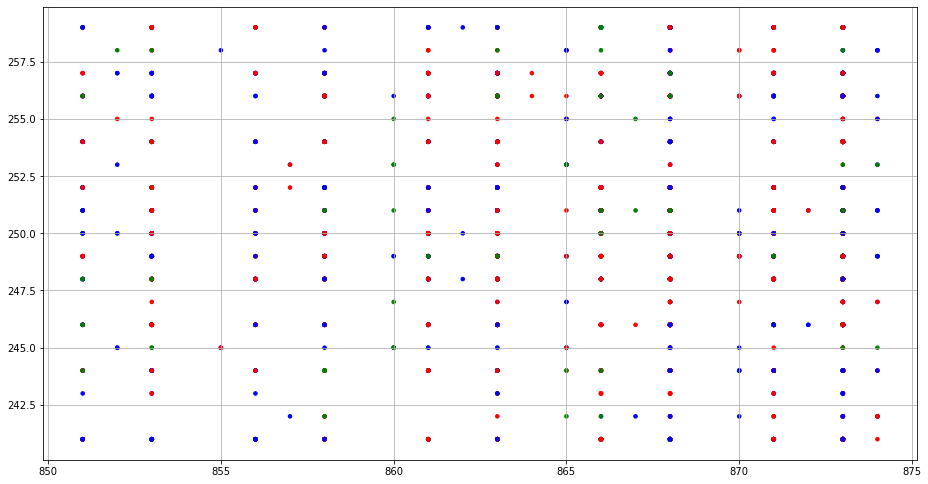

In [19]:
# Shots under the basket

xq = rect2['location_x']
yq = rect2['location_y']
colors = np.where(rect2['current_shot_outcome']=='SCORED','r',np.where(rect2['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/6,50/6))
plt.scatter(xq,yq, s=50, c= colors, marker= '.')
plt.grid(True)

It turns out that this degree of resolution is not very informative. The problem is that the all the points are piled upon each other and there is nothing in between - recalling that the gaps are still approximately one inch. It would only be possble to extract a reliable picture if the data were even more fine grained.

# Conclusion

Using charts can be incredibly helpful in understanding the pattern of events on the field/court/pitch/ice. Charts can suggest to us logical relationships which may exist, but they do not quantify them. In the next two weeks we turn to regression analysis, which is one of the most common ways to quantify relationships among variables.